# Spectroscopy Data Analysis

# Technical Set Up

In [29]:
# Imports + global settings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

In [30]:
# Paths (relative to repo root)
REPO_ROOT = Path(".")          # run notebook from Spec_Report/
DATA_DIR = REPO_ROOT / "data"

LAB_PATH = DATA_DIR / "Germany_lab.csv"
SPC_PATH = DATA_DIR / "Germany_spc.csv"

LAB_PATH, SPC_PATH

(PosixPath('data/Germany_lab.csv'), PosixPath('data/Germany_spc.csv'))

# Inspect Data

In [31]:
# Cell 3 — Load CSVs
lab = pd.read_csv(LAB_PATH)
spc = pd.read_csv(SPC_PATH)

print("lab:", lab.shape)
print("spc:", spc.shape)

display(lab)
display(spc)

lab: (1819, 20)
spc: (1819, 1001)


,Unnamed: 0,SAMPLE_ID,CLAY,SILT,SAND,SOC,CaCO3,N,P,K,CEC,GPS_PROJ,GPS_LAT,GPS_LONG,LC1,LC2,LU1,LU2,MINERAL,COUNTRY
0,1,1093,4.0,18.0,78.0,22.2,0,1.7,80.5,10.7,7.7,WGS84,52.64524,9.33543,B21,8,U111,8,mineral,GERMANY
1,2,1094,16.0,34.0,51.0,13.0,2,1.5,43.8,183.7,13.1,WGS84,52.57206,9.12973,B55,8,U111,8,mineral,GERMANY
2,3,1095,18.0,38.0,43.0,19.9,2,1.8,50.1,196.1,14.3,WGS84,53.00170,8.91282,B32,8,U111,8,mineral,GERMANY
3,4,1096,5.0,11.0,84.0,12.1,0,1.2,105.0,166.4,2.4,WGS84,52.80699,9.33269,B16,8,U111,8,mineral,GERMANY
4,5,1097,1.0,3.0,95.0,21.7,1,0.9,0.0,30.4,2.2,WGS84,52.77242,9.65920,C20,8,U120,8,mineral,GERMANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,1815,40039,15.0,30.0,55.0,29.1,1,2.5,21.4,52.2,14.9,WGS84,51.62220,10.27435,E20,8,U111,8,mineral,GERMANY
1815,1816,40040,18.0,78.0,4.0,14.1,2,1.5,44.6,222.1,15.3,WGS84,51.65822,10.24568,B13,8,U111,8,mineral,GERMANY
1816,1817,40041,16.0,82.0,2.0,11.6,0,1.2,20.7,42.3,5.4,WGS84,51.80220,10.13046,C20,8,U120,8,mineral,GERMANY
1817,1818,40044,8.0,39.0,53.0,49.4,2,1.8,36.3,77.6,9.0,WGS84,50.78921,8.79453,C30,8,U120,U361,mineral,GERMANY


,Unnamed: 0,500,502,504,506,508,510,512,514,516,518,520,522,524,526,528,530,532,534,536,538,540,542,544,546,548,550,552,554,556,558,560,562,564,566,568,570,572,574,576,578,580,582,584,586,588,590,592,594,596,598,600,602,604,606,608,610,612,614,616,...,2380,2382,2384,2386,2388,2390,2392,2394,2396,2398,2400,2402,2404,2406,2408,2410,2412,2414,2416,2418,2420,2422,2424,2426,2428,2430,2432,2434,2436,2438,2440,2442,2444,2446,2448,2450,2452,2454,2456,2458,2460,2462,2464,2466,2468,2470,2472,2474,2476,2478,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,1093,0.095642,0.096142,0.096654,0.097187,0.097732,0.098289,0.098850,0.099422,0.100004,0.100597,0.101197,0.101802,0.102409,0.103016,0.103624,0.104234,0.104846,0.105458,0.106072,0.106689,0.107309,0.107934,0.108563,0.109194,0.109827,0.110459,0.111088,0.111716,0.112342,0.112968,0.113593,0.114212,0.114831,0.115446,0.116063,0.116677,0.117289,0.117898,0.118500,0.119099,0.119690,0.120276,0.120863,0.121436,0.121995,0.122552,0.123110,0.123671,0.124229,0.124783,0.125339,0.125897,0.126458,0.127029,0.127612,0.128201,0.128799,0.129406,0.130029,...,0.306969,0.306826,0.306692,0.306573,0.306477,0.306407,0.306335,0.306250,0.306166,0.306081,0.305984,0.305863,0.305711,0.305524,0.305307,0.305062,0.304812,0.304570,0.304318,0.304035,0.303734,0.303425,0.303113,0.302787,0.302439,0.302074,0.301708,0.301361,0.301012,0.300638,0.300260,0.299895,0.299521,0.299140,0.298775,0.298426,0.298068,0.297698,0.297327,0.296950,0.296557,0.296144,0.295759,0.295416,0.295086,0.294748,0.294422,0.294107,0.293795,0.293502,0.293230,0.292978,0.292750,0.292547,0.292371,0.292219,0.292103,0.292022,0.291972,0.291956
1,1094,0.128091,0.129015,0.129967,0.130951,0.131961,0.132996,0.134044,0.135112,0.136202,0.137310,0.138438,0.139588,0.140763,0.141966,0.143191,0.144450,0.145734,0.147049,0.148396,0.149782,0.151209,0.152684,0.154211,0.155797,0.157438,0.159141,0.160900,0.162715,0.164578,0.166485,0.168422,0.170390,0.172379,0.174368,0.176349,0.178313,0.180255,0.182183,0.184074,0.185915,0.187714,0.189459,0.191145,0.192773,0.194348,0.195877,0.197357,0.198789,0.200164,0.201487,0.202779,0.204039,0.205266,0.206463,0.207640,0.208787,0.209901,0.210994,0.212069,...,0.386909,0.386604,0.386318,0.386066,0.385847,0.385656,0.385487,0.385318,0.385139,0.384951,0.384734,0.384459,0.384121,0.383745,0.383335,0.382863,0.382326,0.381752,0.381151,0.380506,0.379818,0.379117,0.378398,0.377648,0.376878,0.376078,0.375264,0.374487,0.373728,0.372982,0.372265,0.371573,0.370911,0.370287,0.369684,0.369107,0.368568,0.368050,0.367538,0.367015,0.366479,0.365941,0.365414,0.364903,0.364408,0.363933,0.363478,0.363023,0.362558,0.362085,0.361615,0.361151,0.360714,0.360308,0.359926,0.359587,0.359299,0.359047,0.358851,0.358711
2,1095,0.120313,0.121161,0.122029,0.122927,0.123852,0.124802,0.125769,0.126760,0.127778,0.128819,0.129881,0.130963,0.132062,0.133180,0.134314,0.135474,0.136655,0.137860,0.139089,0.140346,0.141629,0.142948,0.144305,0.145701,0.147138,0.148615,0.150127,0.151671,0.153244,0.154837,0.156448,0.158073,0.159713,0.161347,0.162968,0.164584,0.166171,0.167739,0.169278,0.170793,0.172274,0.173718,0.175137,0.176513,0.177841,0.179136,0.180404,0.181645,0.182857,0.184044,0.185209,0.186346,0.187457,0.188553,0.189650,0.190736,0.191801,0.192847,0.193883,...,0.387125,0.386627,0.386157,0.385725,0.385327,0.384963,0.384630,0.384289,0.383942,0.383603,0.383246,0.382846,0.382397,0.381901,0.381358,0.380781,0.380169,0.379528,0.378862,0.378144,0.377367,0.376545,0.375685,0.374810,0.373904,0.372974,0.372093,0.371264,0.370429,0.369565,0.368693,0.367849,0.367048,0.366314,0.365658,0.364990,0.364280,0.363565,0.362865,0.362153,0.361439,0.360750,0.360075,0.359416,0.358785,0.358203,0.357644,0.357037,0.356364,0.355665,0.355012,0.354438,0.353927,0.353439,0.352977,0.352555,0.352161,0.351802,0.351477,0.351193
3,1096,0.127185,0.128030,0.128900,0.129801,0.130725,0.131672,0.132630,0.133606,0.134598,0.135602,0.136618,0.137646,0.138684,0.139730,0.140781,0.141839,0.142900,0.143964,0.145030,0.146101,0.147174,0.1482

In [32]:
# Cell 2 — NA summary (where + how many)
def na_report(df: pd.DataFrame, name: str) -> pd.DataFrame:
    na = df.isna().sum()
    na = na[na > 0].sort_values(ascending=False)
    out = na.to_frame("n_missing")
    out["dataset"] = name
    return out

na_lab = na_report(lab, "lab")
na_spc = na_report(spc, "spc")

print("Total NA lab:", int(lab.isna().sum().sum()))
print("Total NA spc:", int(spc.isna().sum().sum()))

display(na_lab)
display(na_spc)

Total NA lab: 78
Total NA spc: 0


,n_missing,dataset
CLAY,26,lab
SILT,26,lab
SAND,26,lab


,n_missing,dataset


n bands: 1000
min wl: 500 | max wl: 2498
step sizes (unique): [2]
any gaps (step != 2): False


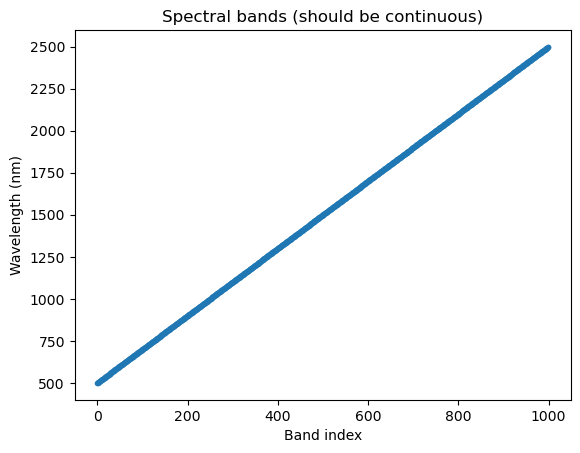

In [33]:
# Spectral bands check (are wavelengths continuous and evenly spaced?)
bands = spc.columns[1:]  # first col is "Unnamed: 0"
wl = bands.astype(int).to_numpy()

dwl = np.diff(wl)

print("n bands:", len(wl))
print("min wl:", wl.min(), "| max wl:", wl.max())
print("step sizes (unique):", np.unique(dwl))
print("any gaps (step != 2):", np.any(dwl != 2))

plt.figure()
plt.plot(wl, ".")
plt.xlabel("Band index")
plt.ylabel("Wavelength (nm)")
plt.title("Spectral bands (should be continuous)")
plt.show()

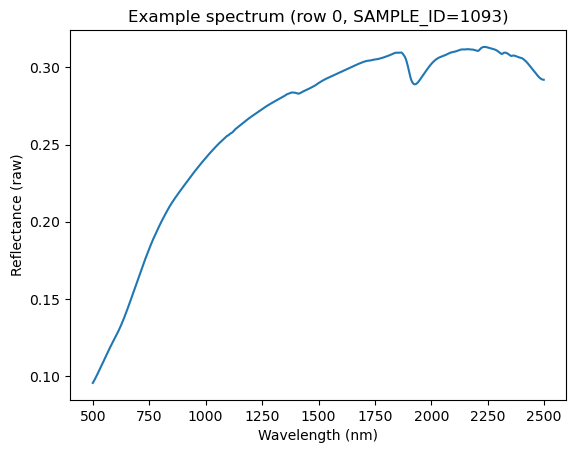

In [34]:
# Plot one example spectrum (raw, no preprocessing)
i = 0  # change to any row index you want
y = spc.iloc[i, 1:].to_numpy(dtype=float)

plt.figure()
plt.plot(wl, y)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance (raw)")
plt.title(f"Example spectrum (row {i}, SAMPLE_ID={spc.iloc[i, 0]})")
plt.show()

SOC NA: 0
SOC min: 3.0
SOC max: 500.3
SOC mean: 32.511105002748764
SOC median: 20.5
SOC std: 44.08241416423645


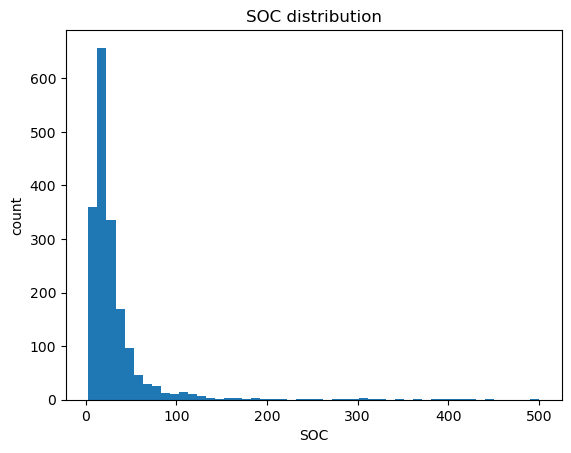

In [35]:
# SOC inspection
soc = lab["SOC"]

print("SOC NA:", int(soc.isna().sum()))
print("SOC min:", float(soc.min()))
print("SOC max:", float(soc.max()))
print("SOC mean:", float(soc.mean()))
print("SOC median:", float(soc.median()))
print("SOC std:", float(soc.std()))

plt.figure()
plt.hist(soc.to_numpy(dtype=float), bins=50)
plt.xlabel("SOC")
plt.ylabel("count")
plt.title("SOC distribution")
plt.show()

In [36]:
# Clean + merge + remove organic soils

lab = lab.drop(columns=["Unnamed: 0"])
spc = spc.rename(columns={"Unnamed: 0": "SAMPLE_ID"})

df = lab.merge(spc, on="SAMPLE_ID", how="inner")

# remove organic soils
df = df[df["MINERAL"] != "organic"]

print("Final dataset shape:", df.shape)
print("Max SOC:", df["SOC"].max())

#recall dataset
df_base = df
df_base

Final dataset shape: (1747, 1019)
Max SOC: 113.5


,SAMPLE_ID,CLAY,SILT,SAND,SOC,CaCO3,N,P,K,CEC,GPS_PROJ,GPS_LAT,GPS_LONG,LC1,LC2,LU1,LU2,MINERAL,COUNTRY,500,502,504,506,508,510,512,514,516,518,520,522,524,526,528,530,532,534,536,538,540,542,544,546,548,550,552,554,556,558,560,562,564,566,568,570,572,574,576,578,580,...,2380,2382,2384,2386,2388,2390,2392,2394,2396,2398,2400,2402,2404,2406,2408,2410,2412,2414,2416,2418,2420,2422,2424,2426,2428,2430,2432,2434,2436,2438,2440,2442,2444,2446,2448,2450,2452,2454,2456,2458,2460,2462,2464,2466,2468,2470,2472,2474,2476,2478,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,1093,4.0,18.0,78.0,22.2,0,1.7,80.5,10.7,7.7,WGS84,52.64524,9.33543,B21,8,U111,8,mineral,GERMANY,0.095642,0.096142,0.096654,0.097187,0.097732,0.098289,0.098850,0.099422,0.100004,0.100597,0.101197,0.101802,0.102409,0.103016,0.103624,0.104234,0.104846,0.105458,0.106072,0.106689,0.107309,0.107934,0.108563,0.109194,0.109827,0.110459,0.111088,0.111716,0.112342,0.112968,0.113593,0.114212,0.114831,0.115446,0.116063,0.116677,0.117289,0.117898,0.118500,0.119099,0.119690,...,0.306969,0.306826,0.306692,0.306573,0.306477,0.306407,0.306335,0.306250,0.306166,0.306081,0.305984,0.305863,0.305711,0.305524,0.305307,0.305062,0.304812,0.304570,0.304318,0.304035,0.303734,0.303425,0.303113,0.302787,0.302439,0.302074,0.301708,0.301361,0.301012,0.300638,0.300260,0.299895,0.299521,0.299140,0.298775,0.298426,0.298068,0.297698,0.297327,0.296950,0.296557,0.296144,0.295759,0.295416,0.295086,0.294748,0.294422,0.294107,0.293795,0.293502,0.293230,0.292978,0.292750,0.292547,0.292371,0.292219,0.292103,0.292022,0.291972,0.291956
1,1094,16.0,34.0,51.0,13.0,2,1.5,43.8,183.7,13.1,WGS84,52.57206,9.12973,B55,8,U111,8,mineral,GERMANY,0.128091,0.129015,0.129967,0.130951,0.131961,0.132996,0.134044,0.135112,0.136202,0.137310,0.138438,0.139588,0.140763,0.141966,0.143191,0.144450,0.145734,0.147049,0.148396,0.149782,0.151209,0.152684,0.154211,0.155797,0.157438,0.159141,0.160900,0.162715,0.164578,0.166485,0.168422,0.170390,0.172379,0.174368,0.176349,0.178313,0.180255,0.182183,0.184074,0.185915,0.187714,...,0.386909,0.386604,0.386318,0.386066,0.385847,0.385656,0.385487,0.385318,0.385139,0.384951,0.384734,0.384459,0.384121,0.383745,0.383335,0.382863,0.382326,0.381752,0.381151,0.380506,0.379818,0.379117,0.378398,0.377648,0.376878,0.376078,0.375264,0.374487,0.373728,0.372982,0.372265,0.371573,0.370911,0.370287,0.369684,0.369107,0.368568,0.368050,0.367538,0.367015,0.366479,0.365941,0.365414,0.364903,0.364408,0.363933,0.363478,0.363023,0.362558,0.362085,0.361615,0.361151,0.360714,0.360308,0.359926,0.359587,0.359299,0.359047,0.358851,0.358711
2,1095,18.0,38.0,43.0,19.9,2,1.8,50.1,196.1,14.3,WGS84,53.00170,8.91282,B32,8,U111,8,mineral,GERMANY,0.120313,0.121161,0.122029,0.122927,0.123852,0.124802,0.125769,0.126760,0.127778,0.128819,0.129881,0.130963,0.132062,0.133180,0.134314,0.135474,0.136655,0.137860,0.139089,0.140346,0.141629,0.142948,0.144305,0.145701,0.147138,0.148615,0.150127,0.151671,0.153244,0.154837,0.156448,0.158073,0.159713,0.161347,0.162968,0.164584,0.166171,0.167739,0.169278,0.170793,0.172274,...,0.387125,0.386627,0.386157,0.385725,0.385327,0.384963,0.384630,0.384289,0.383942,0.383603,0.383246,0.382846,0.382397,0.381901,0.381358,0.380781,0.380169,0.379528,0.378862,0.378144,0.377367,0.376545,0.375685,0.374810,0.373904,0.372974,0.372093,0.371264,0.370429,0.369565,0.368693,0.367849,0.367048,0.366314,0.365658,0.364990,0.364280,0.363565,0.362865,0.362153,0.361439,0.360750,0.360075,0.359416,0.358785,0.358203,0.357644,0.357037,0.356364,0.355665,0.355012,0.354438,0.353927,0.353439,0.352977,0.352555,0.352161,0.351802,0.351477,0.351193
3,1096,5.0,11.0,84.0,12.1,0,1.2,105.0,166.4,2.4,WGS84,52.80699,9.33269,B16,8,U111,8,mineral,GERMANY,0.127185,0.128030,0.128900,0.129801,0.130725,0.131672,0.132630,0.133606,0.134598,0.135602,0.136618,0.137646,0.138684,0.139730,0.140781,0.141839,0.142900,0.143964,0.145030,0.146101,0.147174,0.148253,0.149338,0.150430,0.151530,0.152637,0.153747,0.154862,0.155981,0.157102,0.158226,0.159343,0

In [38]:
na_report(df_base, "final")

,n_missing,dataset


# 1) Data Splitting

In [39]:
# Fixed seed + split (70/30), store indices (test must stay fixed)
from sklearn.model_selection import train_test_split

SEED = 42
train_idx, test_idx = train_test_split(df_base.index, test_size=0.30, random_state=SEED)

df_cal = df_base.loc[train_idx].copy()
df_test = df_base.loc[test_idx].copy()

print("Seed:", SEED)
print("Calibration:", df_cal.shape)
print("Test:", df_test.shape)

Seed: 42
Calibration: (1222, 1019)
Test: (525, 1019)


In [53]:
# Cell — SOC stats (full vs cal vs test) + absolute |test-cal| differences
def soc_stats(s: pd.Series) -> pd.Series:
    return pd.Series({
        "N": int(s.shape[0]),
        "Min": float(s.min()),
        "Max": float(s.max()),
        "Mean": float(s.mean()),
        "Median": float(s.median()),
        "Std": float(s.std()),
    })

stats = pd.DataFrame({
    "Full": soc_stats(df_base["SOC"]),
    "Calibration": soc_stats(df_cal["SOC"]),
    "Test": soc_stats(df_test["SOC"]),
})

stats["|Test - Calibration|"] = (stats["Test"] - stats["Calibration"]).abs()

display(stats)

,Full,Calibration,Test,|Test - Calibration|
N,1747.000000,1222.000000,525.000000,697.000000
Min,3.000000,3.000000,3.700000,0.700000
Max,113.500000,113.500000,103.700000,9.800000
Mean,25.433829,25.704664,24.803429,0.901236
Median,19.900000,20.200000,19.000000,1.200000
Std,17.265270,17.429468,16.876458,0.553010


In [61]:
# Cell — Global plotting colors

COLORS = {
    "full": "#1a1a1a",      # near black
    "cal":  "#1f77b4",      # deep blue
    "test": "#ff7f0e",      # orange
}

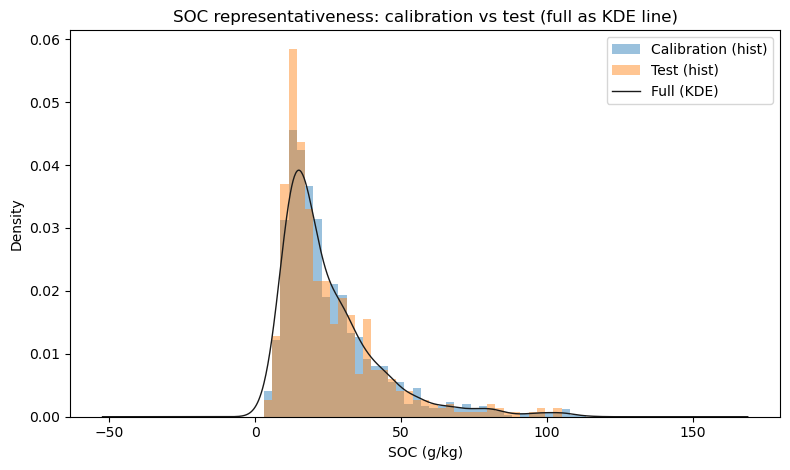

In [67]:
# Cell — SOC distribution: cal vs test as histograms, full as KDE line (black)
soc_full = df_base["SOC"].to_numpy(dtype=float)
soc_cal  = df_cal["SOC"].to_numpy(dtype=float)
soc_test = df_test["SOC"].to_numpy(dtype=float)

bins = np.linspace(soc_full.min(), soc_full.max(), 40)

fig, ax = plt.subplots(figsize=(8, 4.8))

# histograms (counts or density; density is better for comparing different N)
ax.hist(soc_cal,  bins=bins, density=True, alpha=0.45, color=COLORS["cal"], label="Calibration (hist)")
ax.hist(soc_test, bins=bins, density=True, alpha=0.45, color=COLORS["test"], label="Test (hist)")

# full KDE as black line
df_base["SOC"].plot.kde(ax=ax, color=COLORS["full"], linewidth=1, label="Full (KDE)")

ax.set_xlabel("SOC (g/kg)")
ax.set_ylabel("Density")
ax.set_title("SOC representativeness: calibration vs test (full as KDE line)")
ax.legend(frameon=True, loc="best")

plt.tight_layout()
plt.show()

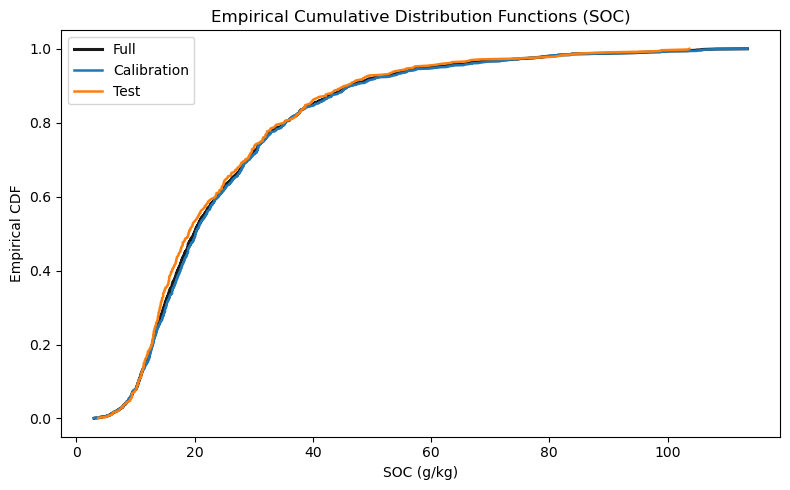

In [66]:
# Cell — Empirical CDF plot (Full, Calibration, Test)

def ecdf(values):
    x = np.sort(values)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

soc_full = df_base["SOC"].to_numpy(dtype=float)
soc_cal  = df_cal["SOC"].to_numpy(dtype=float)
soc_test = df_test["SOC"].to_numpy(dtype=float)

x_full, y_full = ecdf(soc_full)
x_cal,  y_cal  = ecdf(soc_cal)
x_test, y_test = ecdf(soc_test)

plt.figure(figsize=(8, 5))

plt.plot(x_full, y_full, color=COLORS["full"], linewidth=2.2, label="Full")
plt.plot(x_cal,  y_cal,  color=COLORS["cal"], linewidth=1.8, label="Calibration")
plt.plot(x_test, y_test, color=COLORS["test"], linewidth=1.8, label="Test")

plt.xlabel("SOC (g/kg)")
plt.ylabel("Empirical CDF")
plt.title("Empirical Cumulative Distribution Functions (SOC)")
plt.legend(frameon=True, loc="best")
plt.tight_layout()
plt.show()

In [59]:
# Cell — KS tests: subsets vs full dataset

from scipy.stats import ks_2samp

# SOC tests
ks_cal_full = ks_2samp(df_cal["SOC"], df_base["SOC"])
ks_test_full = ks_2samp(df_test["SOC"], df_base["SOC"])

ks_results = pd.DataFrame({
    "Comparison": [
        "Calibration vs Full",
        "Test vs Full"
    ],
    "KS statistic": [
        ks_cal_full.statistic,
        ks_test_full.statistic
    ],
    "p-value": [
        ks_cal_full.pvalue,
        ks_test_full.pvalue
    ]
})

ks_results["KS statistic"] = ks_results["KS statistic"].round(4)
ks_results["p-value"] = ks_results["p-value"].apply(lambda x: f"{x:.3e}")

display(ks_results)

,Comparison,KS statistic,p-value
0,Calibration vs Full,0.0183,9.653e-01
1,Test vs Full,0.0425,4.436e-01


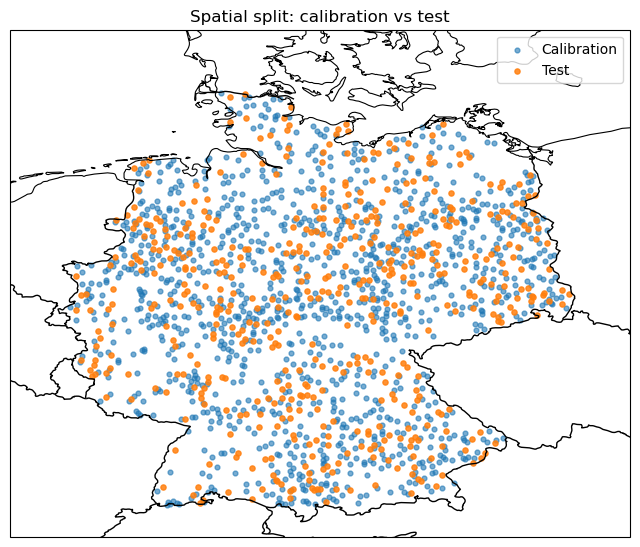

In [65]:
# Cell — Spatial plot with Germany boundary (Cartopy)
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(6.5, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Germany border
ax.add_feature(cfeature.BORDERS, linewidth=1.0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

# Focus map extent roughly on Germany
ax.set_extent([5, 16, 47, 56], crs=ccrs.PlateCarree())

# Points
ax.scatter(
    df_cal["GPS_LONG"],
    df_cal["GPS_LAT"],
    s=12,
    color=COLORS["cal"],
    alpha=0.6,
    label="Calibration",
    transform=ccrs.PlateCarree()
)

ax.scatter(
    df_test["GPS_LONG"],
    df_test["GPS_LAT"],
    s=14,
    color=COLORS["test"],
    alpha=0.85,
    label="Test",
    transform=ccrs.PlateCarree()
)

plt.title("Spatial split: calibration vs test")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()